## A trial attempt to figure out the appropriate no. of neighbors to be chosen in KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as skm




In [2]:
df =pd.read_csv("C:/Users/shrey/OneDrive/Documents/.PES/PIL/fin-dataset_2.csv")
df.columns
df.head()
df.info()
y=df['throughput'].values #throughput 

x=df[[  'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime', 'average_interference',
       'wlan_code_index']].values

#x=df.select_dtypes(exclude='throughput')
#x.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=101)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87909 entries, 0 to 87908
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            87909 non-null  int64  
 1   node_code             87909 non-null  object 
 2   node_type             87909 non-null  int64  
 3   x(m)                  87909 non-null  float64
 4   y(m)                  87909 non-null  float64
 5   primary_channel       87909 non-null  int64  
 6   min_channel_allowed   87909 non-null  int64  
 7   max_channel_allowed   87909 non-null  int64  
 8   RSSI                  87909 non-null  float64
 9   SINR                  87909 non-null  float64
 10  throughput            87909 non-null  float64
 11  average_airtime       87909 non-null  float64
 12  average_interference  87909 non-null  float64
 13  wlan_code_index       87909 non-null  int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 9.4+ MB


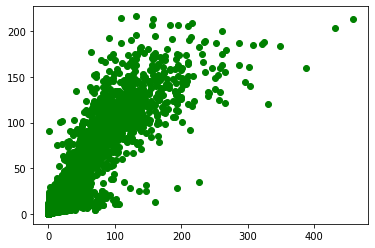

In [4]:
#plot the graph
plt.scatter(y_test, pred, color='red')
plt.show()
#knn plot


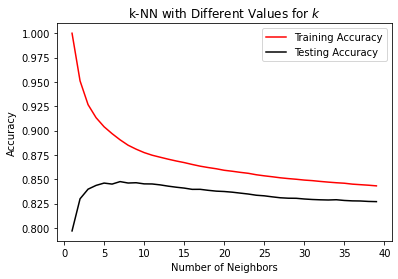

In [13]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()
neighbors = np.arange(1, 40) 
y=df['throughput'].values #throughput 

x=df[[  'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime', 'average_interference',
       'wlan_code_index']].values

#x=df.select_dtypes(exclude='throughput')
#x.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=101)

plot_complexity_curve(neighbors, KNeighborsRegressor, x_train, x_test, y_train, y_test)
plt.show()

### Assuming the above graph to be somewhat accurate, taking the number of neighors as observed

In [14]:
for i in np.arange(7,40): # thirteen not included
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    
    
    print(f"Neighbor(s):{i},pred:{pred},  actual:{y_test}")
    #print(y_test)
    #metrics
    print("MSE:",end=' '); print(skm.mean_squared_error(y_test, pred))
    print("MAE:",end=' '); print(skm.mean_absolute_error(y_test, pred))
    print("R2:",end=' ');print(skm.r2_score(y_test, pred))
    print("knn score:",end=' '); print(knn.score(x_test, y_test))
    print("*****************************************************************************************")
print()
print()
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
#print metrics
print(f"Neighbor(s):{5},pred:{pred},  actual:{y_test}")
print("MSE:",end=' ');print(skm.mean_squared_error(y_test, pred))
print("MAE:",end=' ');print(skm.mean_absolute_error(y_test, pred))
print("R2:",end=' ');print(skm.r2_score(y_test, pred))

Neighbor(s):7,pred:[ 3.63        2.45        0.07714286 ... 14.89857143  7.14857143
  4.33      ],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 127.69710412133001
MAE: 4.954845702585436
R2: 0.8475720289767841
knn score: 0.8475720289767841
*****************************************************************************************
Neighbor(s):8,pred:[ 3.56     2.4425   0.0775  ... 14.5625   6.76     4.08125],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 128.91935316712406
MAE: 4.971702309179843
R2: 0.8461130691717251
knn score: 0.8461130691717251
*****************************************************************************************
Neighbor(s):9,pred:[ 3.28555556  2.53555556  0.06888889 ... 14.62555556  6.82
  4.98444444],  actual:[ 2.53  2.87  0.   ... 14.75 11.21  4.47]
MSE: 128.67527885084493
MAE: 4.979752398286126
R2: 0.8464044129188312
knn score: 0.8464044129188312
*****************************************************************************************
Neighbor